In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [2]:
f= h5py.File('Data1.h5','r')
image = f['img'][:]    
cat = f['cat'][:]  
label = f['label'][:]   # this gives the set of parameters that characterize the galaxy 
snr = f['snr'][:]
sigma = f['sigma'][:]
image_nonoise = f['img_nonoise'][:]    
image_withnoise = f['img_withnoise'][:]    

f.close()


In [3]:
print('image',image.shape)
print('cat',cat.shape)
print('label',label.shape)
print('snr',snr.shape)
print('sigma',sigma.shape)
print('image_nonoise',image_nonoise.shape)
print('image_withnoise',image_withnoise.shape)

image (18779, 64, 64)
cat (18779, 6, 64, 64)
label (18779, 5)
snr (18779,)
sigma (18779,)
image_nonoise (18779, 64, 64)
image_withnoise (18779, 64, 64)


## Only two 1d arrays, SNR and Sigma, lets check for correlations

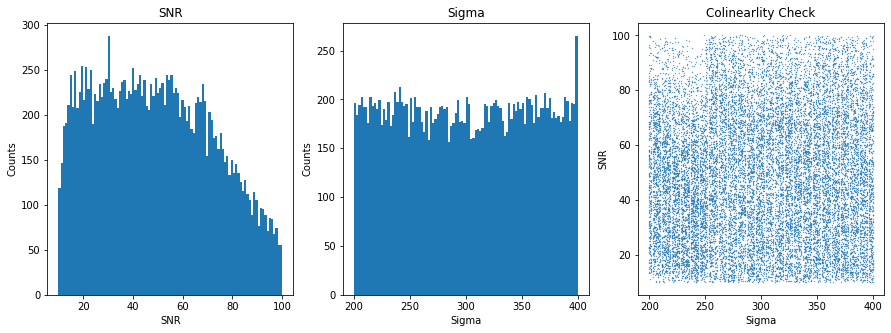

In [4]:
fig,ax = plt.subplots(ncols=3,figsize=(15,5))
ax[0].hist(snr,bins=100)
ax[0].set_title("SNR")
ax[0].set_xlabel("SNR")
ax[0].set_ylabel("Counts")
ax[1].hist(sigma,bins=100)
ax[1].set_title("Sigma")
ax[1].set_xlabel("Sigma")
ax[1].set_ylabel("Counts")
ax[2].scatter(sigma,snr,s=0.1)
ax[2].set_title("Colinearlity Check")
ax[2].set_xlabel("Sigma")
ax[2].set_ylabel("SNR")

plt.show()

## Lets look if any of those labels are correlated:

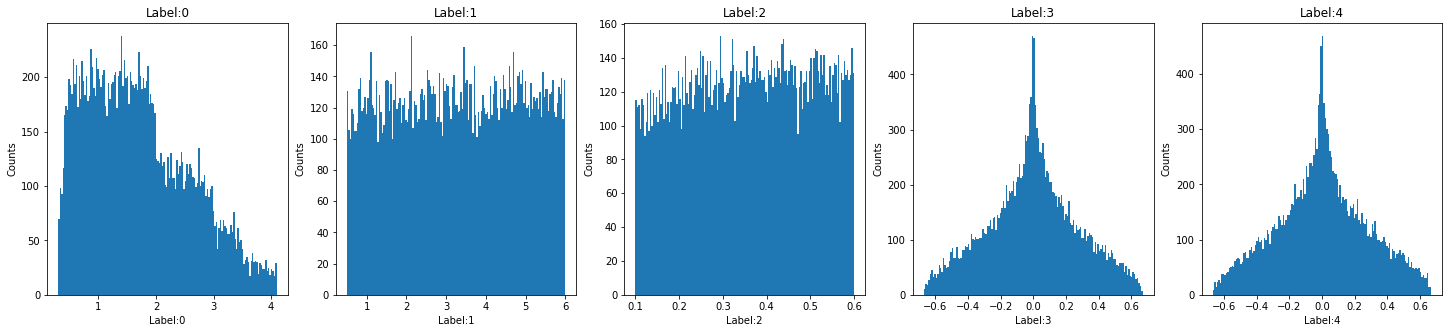

In [5]:
tlabel = label.T

fig,ax = plt.subplots(ncols=len(tlabel),figsize=(len(tlabel)*5,5))
for i in range(len(tlabel)):
    ax[i].hist(tlabel[i],bins=150)
    ax[i].set_title("Label:"+str(i))
    ax[i].set_xlabel("Label:"+str(i))
    ax[i].set_ylabel("Counts")

plt.show()


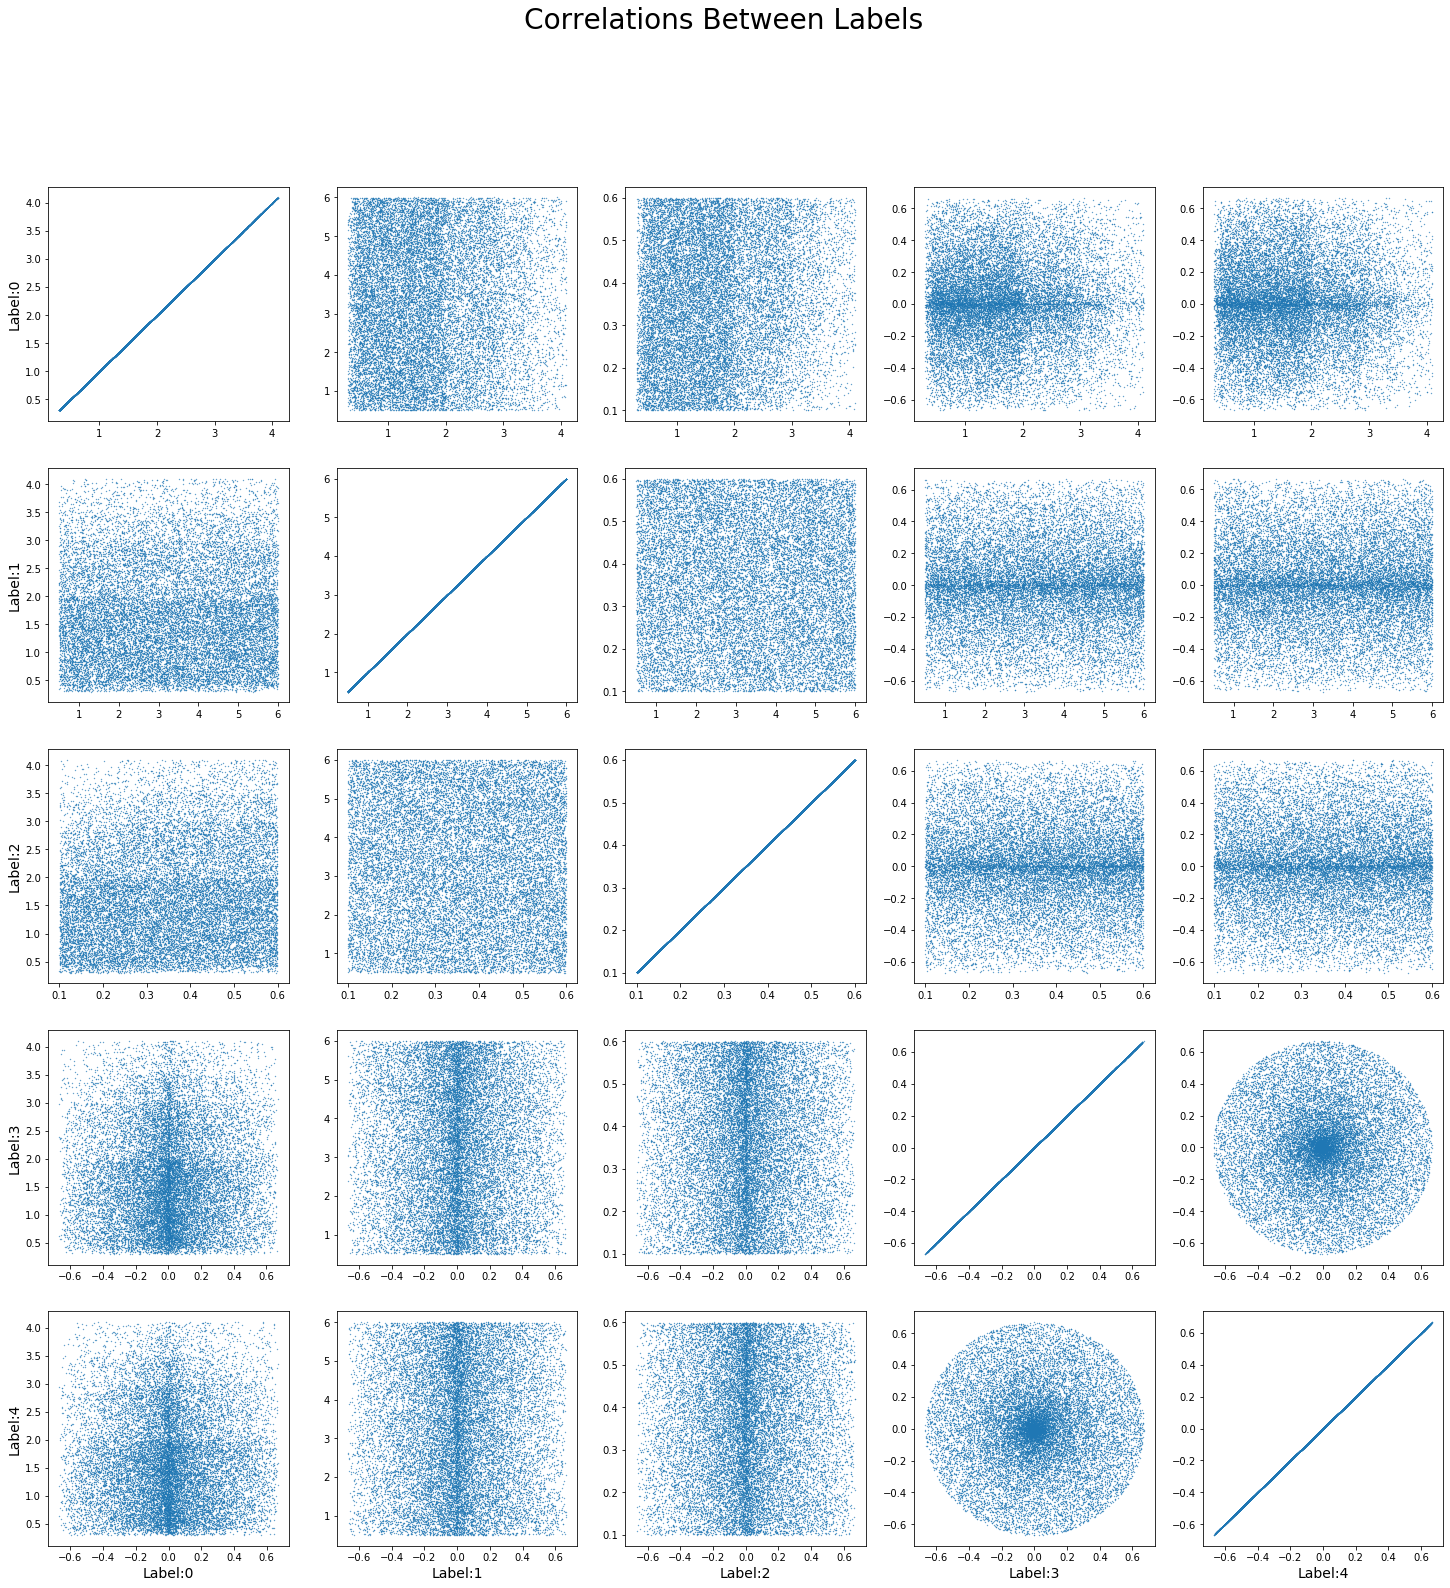

In [6]:
tlabel = label.T

fig,ax = plt.subplots(ncols=len(tlabel),nrows=len(tlabel),figsize=(len(tlabel)*5,len(tlabel)*5))
for i in range(len(tlabel)):
    for j in range(len(tlabel)):
        ax[i,j].scatter(tlabel[i],tlabel[j],s=0.1)
for i in range(len(tlabel)):
    ax[i,0].set_ylabel("Label:"+str(i),fontsize=14)
for j in range(len(tlabel)):
    ax[len(tlabel)-1,j].set_xlabel("Label:"+str(j),fontsize=14)
    
plt.suptitle("Correlations Between Labels",fontsize=28)
plt.show()


### interesting. Label 3 & 4 are correlated with each other. Is this some sort of ellipticity measurment? reminds me of circular polarization and stokes parameters.

### Next up, lets look at what's different about each of the images:

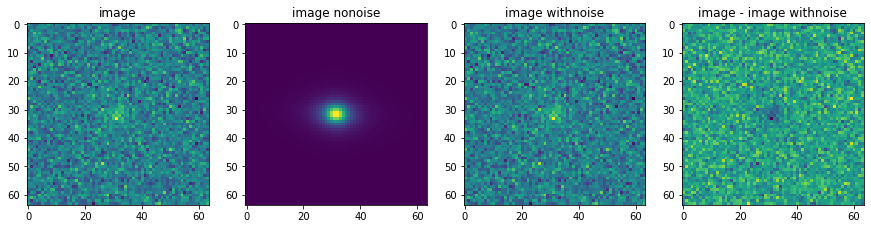

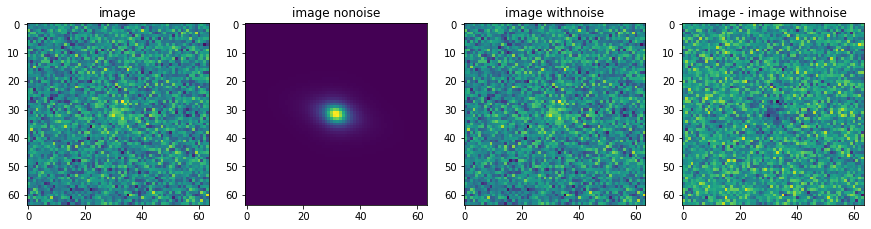

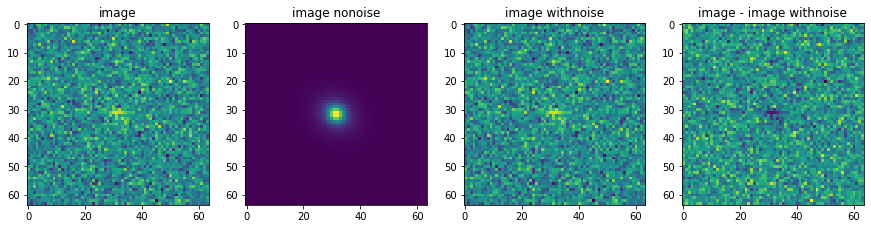

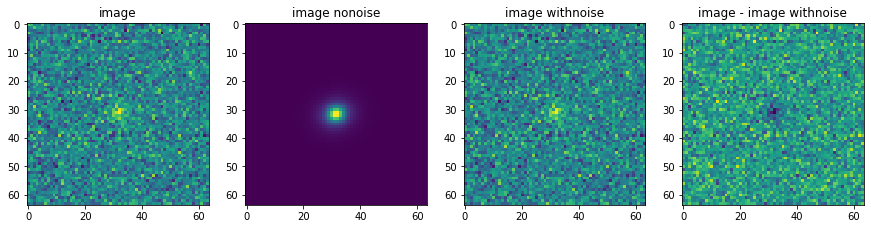

In [25]:
for i in range(4):
    fig,ax = plt.subplots(ncols=4,figsize=(15,5))

    ax[0].imshow(image[i])
    ax[0].set_title("image")
    ax[1].imshow(image_nonoise[i])
    ax[1].set_title("image nonoise")
    ax[2].imshow(image_withnoise[i])
    ax[2].set_title("image withnoise")
    ax[3].imshow(image[i]-image_withnoise[i])
    ax[3].set_title("image - image withnoise")
    
 
    plt.show()

### So even though image and image withnoise look simmilar. They are not the same.

## Lastly look at that last category

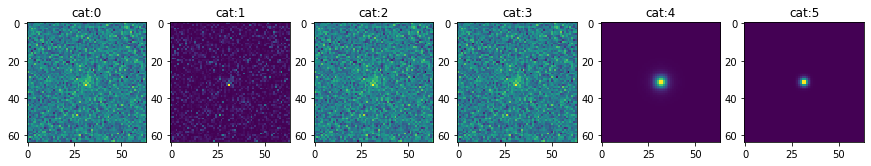

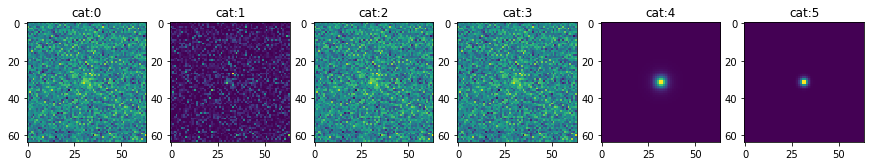

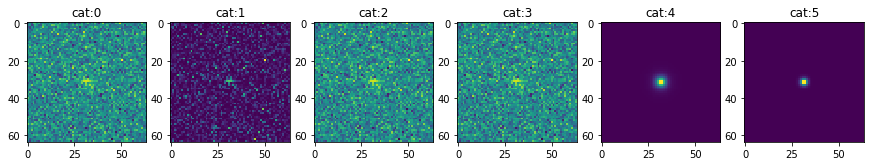

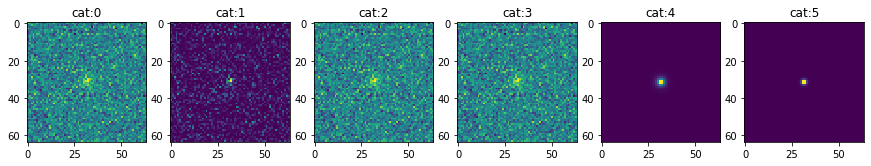

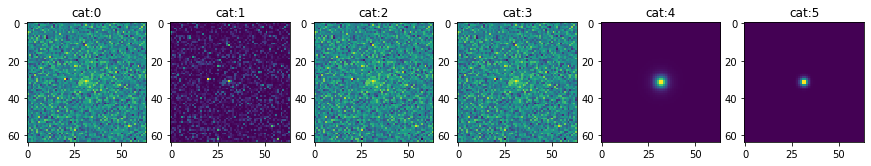

In [24]:
for i in range(5):

    fig,ax = plt.subplots(ncols=6,figsize=(15,5))
    ax[0].imshow(cat[i][0])
    ax[0].set_title("cat:0")
    ax[1].imshow(cat[i][1])
    ax[1].set_title("cat:1")
    ax[2].imshow(cat[i][2])
    ax[2].set_title("cat:2")
    ax[3].imshow(cat[i][3])
    ax[3].set_title("cat:3")
    ax[4].imshow(cat[i][4])
    ax[4].set_title("cat:4")
    ax[5].imshow(cat[i][5])
    ax[5].set_title("cat:5")
    plt.show()

### no real idea what any of these are. cat0 looks raw, cat1 might be raw - galaxy. Not sure about cat2,3. cat4 & 5 seem more symmetric.